# Regression Day 3 - Exercises with answers

## Exercise 1

#### Question 1
##### Import the required packages.
##### Set the working directory to data directory.
##### Print the working directory.

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
main_dir = '/Users/datasociety/Desktop/af-werx'
data_dir = main_dir + "/data"

In [5]:
# Set working directory.
os.chdir(data_dir)
# Check working directory.
print(os.getcwd())


/Users/datasociety/Desktop/af-werx/data


#### Question 2
##### Load `beer-sold-by-price.csv` and save as `ex_data_loglog`.
##### The data consists of 52 weeks of cases sold and price per case for 18-packs of beer at a small chain of supermarkets. 
##### We want to build a regression model that can predict `quantity of cases sold` according to the changes in the `price`.
##### Check the shape of the data, print the first few rows and check for any missing values. 
##### For convenience, change the column names from `PRICE 18PK`, `CASES 18PK` to `Price`, `Quantity`.
##### Lastly, sort the dataframe by `Price`.

In [6]:
ex_data_loglog = pd.read_csv('beer-sold-by-price.csv')
print(ex_data_loglog.shape)
print(ex_data_loglog.head(3))
print(ex_data_loglog.isnull().values.any())

(52, 2)
   PRICE 18PK  CASES 18PK
0       14.10         439
1       18.65          98
2       18.65          70
False


In [8]:
# Rename columns for clarity when interpreting results.
ex_data_loglog = ex_data_loglog.rename(columns = {'PRICE 18PK':'Price',
                                                  'CASES 18PK':'Quantity'})
ex_data_loglog.head()

,Price,Quantity
0,14.10,439
1,18.65,98
2,18.65,70
3,18.65,52
4,18.65,64


In [13]:
ex_data_loglog = ex_data_loglog.sort_values('Price')
ex_data_loglog.head()
ex_data_loglog.tail()

,Price,Quantity
45,19.29,80
44,19.31,70
49,19.43,69
37,19.48,75
41,19.50,32


#### Question 3
##### Transform the values of our predictor and target variable to the log of the actual values. 
##### Name the log values column as `price_log` and `quantity_log`.
##### Print out the first few rows to check.

In [14]:
ex_data_loglog['Price_log'] = np.log(ex_data_loglog['Price'])
ex_data_loglog['Quantity_log'] = np.log(ex_data_loglog['Quantity'])
ex_data_loglog.head(3)

,Price,Quantity,Price_log,Quantity_log
50,13.26,493,2.584752,6.200509
47,13.45,741,2.598979,6.608001
28,13.49,890,2.601949,6.791221


#### Question 4
##### Add a constant to the dataframe.

In [15]:
ex_data_loglog = sm.add_constant(ex_data_loglog)

#### Question 5
##### Fit the model using `sm.OLS` and pass it the columns we transformed to log in previous questions.
##### Name the model `ex_loglog`.

In [16]:
ex_loglog = sm.OLS(ex_data_loglog['Quantity_log'], ex_data_loglog.loc[:,['const','Price_log']]).fit()


#### Question 6
##### Use the fitted log-log model to predict. 
##### Save the predictions as `ex_prediction_loglog`.
##### Take a look at the first 10 rows of the predictions.

In [33]:
ex_prediction_loglog = ex_loglog.predict(ex_data_loglog.loc[:,['const','Price_log']])

ex_prediction_loglog[0:10]

50    6.499954
47    6.404558
28    6.384646
31    6.295769
46    6.251768
39    6.237165
27    6.237165
42    6.208054
16    6.198378
12    6.198378
dtype: float64

#### Question 7
##### Exponentiate the predictions and save as `ex_prediction`.
##### Print the first 10 rows of `ex_prediction`.

In [32]:
ex_prediction = np.exp(ex_prediction_loglog)
ex_prediction[0:10]

50    665.110708
47    604.594284
28    592.674929
31    542.272478
46    518.929366
39    511.406497
27    511.406497
42    496.733573
16    491.950537
12    491.950537
dtype: float64

#### Question 8
##### Create a scatterplot of the actual values of `quantity` and the predicted values of `quantity`. 
##### Plot the actual quantity as the scatter points and the predicted quantity as a red line to compare.

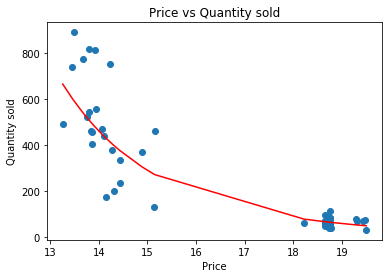

In [19]:
plt.scatter(ex_data_loglog['Price'],
            ex_data_loglog['Quantity'])
plt.plot(ex_data_loglog['Price'],
         ex_prediction, 
         'red')
plt.title("Price vs Quantity sold")
plt.xlabel("Price")
plt.ylabel("Quantity sold")
plt.show()


#### Question 9
##### Get the residuals and put them into a dataframe called `ex_loglog_results`, along with the actual values of `quantity` and the exponentiated predictions of `quantity`.

##### Using the RMSE formula, get the RMSE of our log-log model.

In [23]:
ex_actual = ex_data_loglog['Quantity']
ex_prediction = ex_prediction
ex_residuals = ex_actual - ex_prediction
ex_loglog_results =  pd.concat([ex_actual.rename('actual'),
                             ex_prediction.rename('predicted'),
                             ex_residuals.rename('residuals')], axis = 1)

def rmse(ex_predictions,ex_actual):
    return np.sqrt(((ex_prediction-ex_actual) ** 2).mean())

print(rmse(ex_loglog_results['predicted'],ex_loglog_results['actual']))



118.24594924491831


#### Question 10

##### Build a standard linear model with the dataset, and get a plot of `actual vs.predicted`.
##### Compare the plot with out previous plot with the log-log mode and compare.

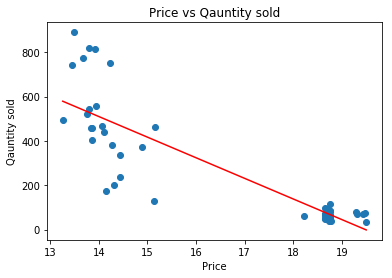

127.99375144320852


In [31]:
ex_model_lin = sm.OLS(ex_data_loglog['Quantity'], ex_data_loglog.loc[:,['const','Price']]).fit()
ex_prediction = ex_model_lin.predict(ex_data_loglog.loc[:,['const','Price']])

plt.scatter(ex_data_loglog['Price'],
            ex_data_loglog['Quantity'])
plt.plot(ex_data_loglog['Price'],
         ex_prediction,
         'red')
plt.title("Price vs Qauntity sold")
plt.xlabel("Price")
plt.ylabel("Qauntity sold")
plt.show()

ex_actual = ex_data_loglog['Quantity']
ex_prediction = ex_prediction
ex_residuals = ex_actual - ex_prediction
ex_loglog_results =  pd.concat([ex_actual.rename('actual'),
                             ex_prediction.rename('predicted'),
                             ex_residuals.rename('residuals')], axis = 1)

def rmse(ex_predictions,ex_actual):
    return np.sqrt(((ex_prediction-ex_actual) ** 2).mean())

print(rmse(ex_loglog_results['predicted'],ex_loglog_results['actual']))


## Exercise 2

#### Question 1
##### Load `loglin.csv` and save as `ex_data_loglin`.
##### The data consists of 200 weeks of stock data. 
##### We want to build a regression model that can predict `stock price` according to the changes in the `day`.
##### Check the shape of the data, print the first few rows and check for any missing values. 

In [38]:
ex_data_loglin = pd.read_csv('loglin.csv')
print(ex_data_loglin.shape)
print(ex_data_loglin.head(3))
print(ex_data_loglin.isnull().values.any())

(504, 2)
   Day  Stock Price
0    1       105.26
1    2       105.35
2    3       102.71
False


#### Question 2
##### We need to transform the values of our target variable to the log of the actual values. 
##### Name the log values column as `price_log`.
##### Print out the first few rows to check.

In [39]:
ex_data_loglin['price_log'] = np.log(ex_data_loglin['Stock Price'])
ex_data_loglin.head(3)

,Day,Stock Price,price_log
0,1,105.26,4.656433
1,2,105.35,4.657288
2,3,102.71,4.631909


#### Question 3
##### Add a constant to the dataframe.

In [40]:
ex_data_loglin = sm.add_constant(ex_data_loglin)
ex_data_loglin.head(3)

,const,Day,Stock Price,price_log
0,1.0,1,105.26,4.656433
1,1.0,2,105.35,4.657288
2,1.0,3,102.71,4.631909


#### Question 4
##### Fit the model using `sm.OLS` and pass it the target column we transformed to log in the step before and the predictor column, which is `Day` and the constant.
##### Name the model `ex_loglin`.

In [44]:
ex_loglin = sm.OLS(ex_data_loglin['price_log'], ex_data_loglin.loc[:,['const','Day']]).fit()
ex_loglin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     5364.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):          3.86e-270
Time:                        10:37:56   Log-Likelihood:                 713.34
No. Observations:                 504   AIC:                            -1423.
Df Residuals:                     502   BIC:                            -1414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4944      0.005    855.597      0.000       4.484       4.505
Day            0.0013    1.8e-05     73.242      0.000       0.001       0.001
==============================================================================
Omnibus:                       18.886   Durbin-Watson:                   0.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                8.904
Skew:                           0.047   Prob(JB):                       0.0117
Kurtosis:                       2.356   Cond. No.                         584.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 5
##### Use the fitted log-lin model to predict. 
##### Save the predictions as `ex_prediction_loglin`.
##### Take a look at the first 10 rows of the predictions.

In [45]:
ex_prediction_lin = ex_loglin.predict(ex_data_loglin.loc[:,['const','Day']])
ex_prediction_lin[0:10]


0    4.495741
1    4.497061
2    4.498381
3    4.499702
4    4.501022
5    4.502342
6    4.503662
7    4.504983
8    4.506303
9    4.507623
dtype: float64

#### Question 6
##### Exponentiate the predictions and save as `ex_prediction`.
##### Print the first 10 rows of `ex_prediction`.

In [46]:
ex_prediction = np.exp(ex_prediction_lin)
ex_prediction[0:10]

0    89.634565
1    89.752981
2    89.871553
3    89.990282
4    90.109168
5    90.228211
6    90.347411
7    90.466769
8    90.586284
9    90.705958
dtype: float64

#### Question 7
##### Create a scatterplot of the actual values of `Stock Price` and the predicted values of `Stock Price`. 
##### Plot the actual stock price as the scatter points and the predicted stock price as a red line to compare.

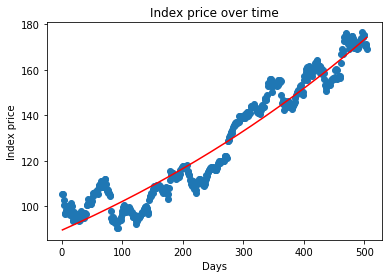

In [50]:
plt.scatter(ex_data_loglin['Day'],
            ex_data_loglin['Stock Price'])
plt.plot(ex_data_loglin['Day'], 
         ex_prediction, 
         'red')
plt.title("Index price over time")
plt.xlabel("Days")
plt.ylabel("Index price")
plt.show()


#### Question 8
##### Get the residuals and put them into a dataframe called `ex_loglin_results`, along with the actual values of `Stock Price` and the exponentiated predictions of `Stock Price`.

##### Using the RMSE formula, get the RMSE of our log-lin model.

In [53]:
actual = ex_data_loglin['Stock Price']
prediction = ex_prediction
residuals = actual - prediction
ex_loglin_results =  pd.concat([actual.rename('actual'),
                                prediction.rename('predicted'),
                                residuals.rename('residuals')], axis = 1)
print(ex_loglin_results.head())
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(ex_loglin_results['predicted'],ex_loglin_results['actual']))



   actual  predicted  residuals
0  105.26  89.634565  15.625435
1  105.35  89.752981  15.597019
2  102.71  89.871553  12.838447
3  100.70  89.990282  10.709718
4   96.45  90.109168   6.340832
6.834043044445937


#### Question 9

##### Build a standard linear model with the dataset, and get a plot of `actual vs.predicted`.
##### Compare the plot with out previous plot with the log-lin model and compare.

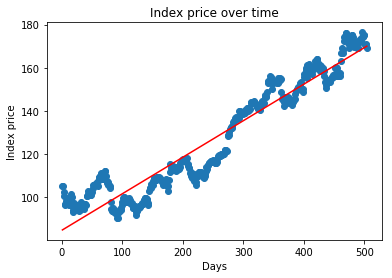

7.645477710537618


In [57]:
# Fit the model
ex_model_lin = sm.OLS(ex_data_loglin['Stock Price'], ex_data_loglin.loc[:,['const','Day']]).fit()
prediction = ex_model_lin.predict(ex_data_loglin.loc[:,['const','Day']])
plt.scatter(ex_data_loglin['Day'],
            ex_data_loglin['Stock Price'])
plt.plot(ex_data_loglin['Day'],
         prediction, 
         'red')
plt.title("Index price over time")
plt.xlabel("Days")
plt.ylabel("Index price")
plt.show()

def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(ex_loglin_results['predicted'],ex_loglin_results['actual']))



## Exercise 3

#### Question 1
##### Load `poly-data.csv` and save as `ex_data_poly`.
##### This is a dataset generated to show 150 data points that show a polynomial relationship.
##### Check the shape of the data, print the first few rows and check for any missing values. 
##### Sort the dataframe according to `x`.

In [58]:
ex_data_poly = pd.read_csv('poly-data.csv')
print(ex_data_poly.shape)
print(ex_data_poly.head(3))
print(ex_data_poly.isnull().values.any())

(150, 2)
          x         y
0  0.149973  0.458827
1  0.185393  1.191452
2  0.730816 -0.522617
False


In [59]:
ex_data_poly = ex_data_poly.sort_values('x')
ex_data_poly.head()

,x,y
129,0.005676,-0.098644
42,0.005998,1.091955
108,0.012313,-0.202702
141,0.016256,-0.389729
140,0.018529,0.212417


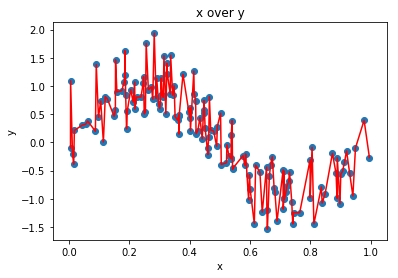

In [73]:
plt.scatter(ex_data_poly['x'],
            ex_data_poly['y'])
plt.plot(ex_data_poly['x'], 
        ex_data_poly['y'], 'red')
plt.title("x over y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


#### Question 2
##### Using `np.power()`, add two new predictors called `x2`, and `x3`.
##### Print out the first few rows with the new predictors.

In [65]:
ex_data_poly['x2'] = np.power(ex_data_poly['x'], 2)
ex_data_poly['x3'] = np.power(ex_data_poly['x'], 3)
ex_data_poly.head(3)

,x,y,x2,x3
129,0.005676,-0.098644,0.000032,1.829024e-07
42,0.005998,1.091955,0.000036,2.157555e-07
108,0.012313,-0.202702,0.000152,1.866939e-06


#### Question 3
##### Add a constant to our data and fit the model using `sm.OLS`. 
##### Name the fitted model as `ex_model_poly`.

In [68]:
ex_data_poly = sm.add_constant(ex_data_poly)
print(ex_data_poly.head())
ex_model_poly = sm.OLS(ex_data_poly['y'], ex_data_poly.loc[:,['const','x','x2','x3']]).fit()
ex_model_poly.summary()

     const         x         y        x2            x3
129    1.0  0.005676 -0.098644  0.000032  1.829024e-07
42     1.0  0.005998  1.091955  0.000036  2.157555e-07
108    1.0  0.012313 -0.202702  0.000152  1.866939e-06
141    1.0  0.016256 -0.389729  0.000264  4.295415e-06
140    1.0  0.018529  0.212417  0.000343  6.361774e-06


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           5.17e-47
Time:                        11:45:12   Log-Likelihood:                -66.409
No. Observations:                 150   AIC:                             140.8
Df Residuals:                     146   BIC:                             152.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1631      0.137     -1.194      0.234      -0.433       0.107
x             11.7706      1.115     10.560      0.000       9.568      13.973
x2           -34.2950      2.616    -13.110      0.000     -39.465     -29.125
x3            22.9442      1.768     12.981      0.000      19.451      26.437
==============================================================================
Omnibus:                        4.721   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.339
Skew:                           0.408   Prob(JB):                        0.114
Kurtosis:                       3.168   Cond. No.                         125.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Question 4
##### Using `ex_model_poly` model, predict the target using `x`, `x2`, `x3` as predictors.
##### Save the predictions as `ex_prediction_poly`.
##### Print the first ten rows of the predictions.

In [69]:
ex_prediction_poly = ex_model_poly.predict(ex_data_poly.loc[:,['const','x', 'x2', 'x3']])
ex_prediction_poly[0:10]

129   -0.097369
42    -0.093715
108   -0.023304
141    0.019291
140    0.043389
96     0.302458
24     0.388395
91     0.444356
10     0.623348
29     0.640664
dtype: float64

#### Question 5
##### Create a plot that shows the actual values of `y` and the predicted values of `y`. 
##### Plot the actual points of `y` as scatterplots and the predicted values of `y` as a red line. 

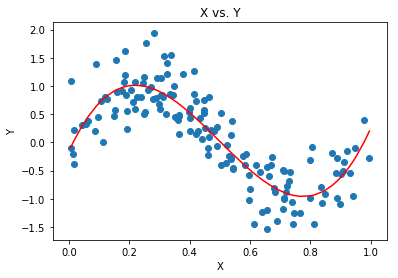

In [72]:
plt.scatter(ex_data_poly['x'],
            ex_data_poly['y'])
plt.plot(ex_data_poly['x'], 
         ex_prediction_poly, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#### Question 6
##### Get the residuals and put them into a dataframe called `ex_poly_results`, along with the actual values of `y` and the predictions of `y`.

##### Using the RMSE formula, get the RMSE of our polynomial model.


In [79]:
actual = ex_data_poly['y']
prediction = ex_prediction_poly
residuals = actual - prediction
ex_poly_results =  pd.concat([actual.rename('actual'),
                           prediction.rename('predicted'),
                           residuals.rename('residuals')],
                           axis = 1)
print(ex_poly_results.head())
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(ex_poly_results['predicted'],ex_poly_results['actual']))

       actual  predicted  residuals
129 -0.098644  -0.097369  -0.001275
42   1.091955  -0.093715   1.185670
108 -0.202702  -0.023304  -0.179398
141 -0.389729   0.019291  -0.409020
140  0.212417   0.043389   0.169028
0.3767343435208061


#### Question 7

##### Build a standard linear model and plot `actual vs predicted` to see how the model would have performed.
##### Compare this plot with the previous plot we made with polynomial terms added in.

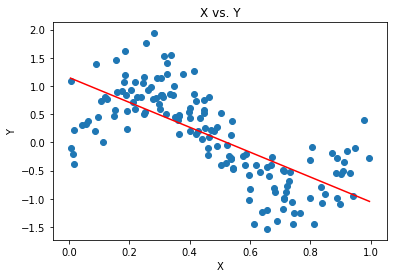

       actual  predicted  residuals
129 -0.098644   1.138439  -1.237083
42   1.091955   1.137730  -0.045774
108 -0.202702   1.123784  -1.326486
141 -0.389729   1.115079  -1.504808
140  0.212417   1.110058  -0.897641
0.5560635262438554


In [80]:
# Fit the model
ex_model_lin = sm.OLS(ex_data_poly['y'], ex_data_poly.loc[:,['const','x']]).fit()
prediction = ex_model_lin.predict(ex_data_poly.loc[:,['const','x']])

plt.scatter(ex_data_poly['x'],
            ex_data_poly['y'])
plt.plot(ex_data_poly['x'], 
         prediction, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

actual = ex_data_poly['y']
prediction = prediction
residuals = actual - prediction
ex_poly_results =  pd.concat([actual.rename('actual'),
                           prediction.rename('predicted'),
                           residuals.rename('residuals')],
                           axis = 1)
print(ex_poly_results.head())
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(ex_poly_results['predicted'],ex_poly_results['actual']))

## Exercise 4

#### Question 1
##### Load the `interaction-data.csv` as `ex_interaction`. 
##### This is a dataset that predicts `Income` with `Illiteracy` and `High School Graduate Percentage` as predictors.
##### Check the shape of `ex_interaction` and print the first few rows to see how the dataset looks like. 
##### Check if there are any missing values in the dataset. 

In [81]:
ex_interaction = pd.read_csv('interaction-data.csv')
print(ex_interaction.shape)
print(ex_interaction.head(3))
print(ex_interaction.isnull().values.any())

(50, 3)
   Income  Illiteracy  HS Grad
0    3624         2.1     41.3
1    6315         1.5     66.7
2    4530         1.8     58.1
False


#### Question 2
##### Add the interaction term between `Illiteracy` and `HS Grad`` as `illiteracy:hsgrad`.
##### Take a look at the first few rows again.

In [83]:
ex_interaction['Illiteracy:hsgrad'] = ex_interaction['Illiteracy'] * ex_interaction['HS Grad']
ex_interaction.head()

,Income,Illiteracy,HS Grad,Illiteracy:hsgrad
0,3624,2.1,41.3,86.73
1,6315,1.5,66.7,100.05
2,4530,1.8,58.1,104.58
3,3378,1.9,39.9,75.81
4,5114,1.1,62.6,68.86


#### Question 3
##### Add a constant to the dataframe and fit the model with 'Income' as the target variable and the rest of the variables as predictors.
##### Name th model as `ex_model_interact`.

In [86]:
ex_interaction = sm.add_constant(ex_interaction)

ex_model_interaction = sm.OLS(ex_interaction['Income'], ex_interaction.loc[:,['const','Illiteracy','HS Grad','Illiteracy:hsgrad']]).fit()

ex_model_interaction.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     15.47
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           4.29e-07
Time:                        13:31:52   Log-Likelihood:                -374.04
No. Observations:                  50   AIC:                             756.1
Df Residuals:                      46   BIC:                             763.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              5679.1001   1277.612      4.445      0.000    3107.401    8250.799
Illiteracy        -2499.1809    759.246     -3.292      0.002   -4027.464    -970.898
HS Grad             -21.2534     22.656     -0.938      0.353     -66.858      24.351
Illiteracy:hsgrad    47.6458     14.536      3.278      0.002      18.387      76.905
==============================================================================
Omnibus:                        1.234   Durbin-Watson:                   2.482
Prob(Omnibus):                  0.539   Jarque-Bera (JB):                0.574
Skew:                          -0.213   Prob(JB):                        0.750
Kurtosis:                       3.308   Cond. No.                     1.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 4
##### Using the fitted model, predict using the same variables as predictors.
##### Name the predictions as `ex_prediction_interact` and take a look at the first 10 rows of the prediction.

In [88]:
ex_prediction_interact = ex_model_interaction.predict(ex_interaction.loc[:,['const','Illiteracy','HS Grad','Illiteracy:hsgrad']])
ex_prediction_interact[0:10]

0    3685.379693
1    5279.695256
2    4928.555613
3    3694.678020
4    4880.432683
5    4702.781546
6    4674.796122
7    4610.719855
8    4570.260191
9    3686.693648
dtype: float64

#### Question 5
##### Evaluate the model using the defined RMSE function.

In [90]:
actual = ex_interaction['Income']
prediction = ex_prediction_interact
residuals = actual - prediction
ex_interact_results =  pd.concat([actual.rename('actual'),
                               prediction.rename('predicted'),
                               residuals.rename('residuals')],
                              axis = 1)
print(ex_interact_results.head())
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(interact_results['predicted'],interact_results['actual']))



   actual    predicted    residuals
0    3624  3685.379693   -61.379693
1    6315  5279.695256  1035.304744
2    4530  4928.555613  -398.555613
3    3378  3694.678020  -316.678020
4    5114  4880.432683   233.567317
429.2036945597498


#### Question 6
##### How would the model have performed if we did not add in the interaction term?
##### Build a new model without the interaction term and calculate the RMSE. 

In [93]:
ex_model_interaction2 = sm.OLS(ex_interaction['Income'], ex_interaction.loc[:,['const','Illiteracy','HS Grad']]).fit()
ex_model_interaction2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     14.77
Date:                Wed, 28 Aug 2019   Prob (F-statistic):           1.06e-05
Time:                        13:36:56   Log-Likelihood:                -379.29
No. Observations:                  50   AIC:                             764.6
Df Residuals:                      47   BIC:                             770.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2131.3281    745.892      2.857      0.006     630.787    3631.869
Illiteracy   -52.6365    152.888     -0.344      0.732    -360.207     254.934
HS Grad       44.5518     11.538      3.861      0.000      21.341      67.763
==============================================================================
Omnibus:                        1.037   Durbin-Watson:                   2.291
Prob(Omnibus):                  0.595   Jarque-Bera (JB):                0.486
Skew:                           0.217   Prob(JB):                        0.784
Kurtosis:                       3.211   Cond. No.                         584.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
ex_prediction_interact2 = ex_model_interaction2.predict(ex_interaction.loc[:,['const','Illiteracy','HS Grad']])
actual = ex_interaction['Income']
prediction = ex_prediction_interact2
residuals = actual - prediction
ex_interact_results =  pd.concat([actual.rename('actual'),
                               prediction.rename('predicted'),
                               residuals.rename('residuals')],
                              axis = 1)
print(ex_interact_results.head())
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())

print(rmse(interact_results['predicted'],interact_results['actual']))

   actual    predicted    residuals
0    3624  3860.780466  -236.780466
1    6315  5023.977913  1291.022087
2    4530  4625.041540   -95.041540
3    3378  3808.935261  -430.935261
4    5114  4862.370173   251.629827
476.70054097232793
